In [2]:
import numpy as np


altitudes = np.array([[0,2,4,3,5,6,2,4]
  ,[1,2,0,1,2,5,7,6]
  ,[0,3,1,4,2,7,10,7]
  ,[2,6,4,2,5,9,8,11]
  ,[4,10,7,9,6,8,7,9]
  ,[4,7,5,8,8,6,13,10]
  ,[7,9,11,9,10,12,14,12]
  ,[9,8,10,12,11,8,10,17]], dtype=float) 

# define function that calculates all legal moves from a given position taking altitudes into acount, the horse can jump along ayes in permutations of (0,1,2)
def legal_moves_2d(pos, altitudes):
    # Define all possible knight moves
    knight_moves = [(2, 1), (1, 2), (-1, -2), (-2, -1), (2, -1), (1, -2), (-1, 2), (-2, 1)]
    moves = []

    # Current altitude
    current_altitude = altitudes[pos]

    for dy, dz in knight_moves:
        y_new, z_new = pos[0] + dy, pos[1] + dz
        
        # Check if the new position is within the bounds of the board
        if 0 <= y_new < altitudes.shape[0] and 0 <= z_new < altitudes.shape[1]:
            # Check if the altitude of the new position is the same as the current one
            if altitudes[y_new, z_new] == current_altitude:
                # Add the new position to the list of legal moves
                moves.append((y_new, z_new))
    
    return moves

def legal_moves_lat(pos, altitudes):
    moves = []
    x, y = pos  # Assuming pos is now a tuple (x, y)
    z = altitudes[x, y]
    
    # Define all possible lateral knight moves (along x-axis here)
    lateral_moves = [(2, 1), (1, 2), (-1, -2), (-2, -1), (2, -1), (1, -2), (-1, 2), (-2, 1)]
    
    for dx, dz in lateral_moves:
        x_new = x + dx
        # Assuming lateral move does not change the y-coordinate
        if 0 <= x_new < altitudes.shape[0]:
            z_new = z + dz
            # Check if the new altitude matches z_new and is within the bounds
            if 0 <= z_new < altitudes.shape[1] and altitudes[x_new, y] == z_new:
                moves.append((x_new, y))
    
    return moves

def legal_moves_ver(pos, altitudes):
    moves = []
    x, y = pos  # Assuming pos is now a tuple (x, y)
    z = altitudes[x, y]
    
    # Define all possible vertical knight moves (along y-axis and altitude here)
    vertical_moves = [(2, 1), (1, 2), (-1, -2), (-2, -1), (2, -1), (1, -2), (-1, 2), (-2, 1)]
    
    for dy, dz in vertical_moves:
        y_new = y + dy
        # Assuming vertical move does not change the x-coordinate
        if 0 <= y_new < altitudes.shape[1]:
            z_new = z + dz
            # Check if the new altitude matches z_new and is within the bounds
            if 0 <= z_new < altitudes.shape[0] and altitudes[x, y_new] == z_new:
                moves.append((x, y_new))
    
    return moves




def legal_moves_all(pos, altitudes):
    return legal_moves_2d(pos, altitudes) + legal_moves_lat(pos, altitudes) + legal_moves_ver(pos, altitudes)


# if knight spends 1 min in pos, the pos sinks by 1/n rate, where n is the number of squares with same altitudes, except the square which is diametrically opposite
import numpy as np

def find_diametric(pos):
    x, y = pos
    x_new = 7 - x
    y_new = 7 - y
    return (x_new, y_new)

def find_n(pos, altitudes):
    # find number of squares with same altitude
    x, y = pos
    z = altitudes[x, y]
    diametric = find_diametric(pos)
    n = np.sum(altitudes == z)
    
    if altitudes[diametric] == z:
        n -= 1  # Subtract 1 more if diametric has the same altitude
    
    return n

def update_altitude(pos, altitudes, time):
    altitudes_copy = altitudes.copy()
    x, y = pos
    z = altitudes[x, y]
    diametric = find_diametric(pos)
    n = find_n(pos, altitudes)

    # Avoid division by zero; the rate is the amount of altitude change per minute.
    rate = time / (n)  # +1 to include the knight's square
    # Update the altitude of all squares with the same altitude
    for i in range(8):
        for j in range(8):
            if altitudes[i, j] == z:
                # If not the diametrically opposite square, decrement altitude
                if (i, j) != diametric:
                    altitudes_copy[i, j] -= rate
            if (i, j) == diametric and altitudes[i, j] != z:
                    # If it is the diametrically opposite square, increment altitude
                altitudes_copy[i, j] += rate

    return altitudes_copy

 


def altitude_diff(pos, altitudes):
    x, y = pos
    z = altitudes[x, y]
    z_diff = []  # Initialize an empty list to hold the altitude differences
    rate = 1 / find_n(pos, altitudes)  # Calculate the rate of altitude change
    knight_moves = [(1, 1), (2, 2), (-1, -1), (-2, -2)]

    # Assuming you have defined knight_moves somewhere in your code
    for dx, dy in knight_moves:
        x_new, y_new = x + dx, y + dy

        # Check if the new x position is within the bounds of the board
        if 0 <= x_new < altitudes.shape[0]:
            if altitudes[x_new, y] != z:
                z_diff.append((x_new, y, altitudes[x_new, y] - z))  # Append the tuple directly to z_diff

        # Check if the new y position is within the bounds of the board
        if 0 <= y_new < altitudes.shape[1]:
            if altitudes[x, y_new] != z:
                z_diff.append((x, y_new, altitudes[x, y_new] - z))  # Append the tuple directly to z_diff

    wait_times = wait_units(z_diff, pos, rate)
    return wait_times




def wait_units(z_diff, pos, rate):
    wait_times = []
    x1,y1 = pos

    for x, y, diff in z_diff:
        x0 = x - x1
        y0 = y - y1
        if diff < 1 and ((x0+y0) == 2 or (x0+y0) == -2):
            wait_times.append(((x, y), (1 - diff)/rate))
        elif diff < 2 and ((x0+y0) == 1 or (x0+y0) == -1):
            wait_times.append(((x, y), (2 - diff)/rate))
    return wait_times


altitude_diff((0,0), altitudes)

def legal_moves_with_wait_times(pos, altitudes):
    legal_moves = legal_moves_all(pos, altitudes)  # Get legal moves based on altitude
    wait_times_moves = altitude_diff(pos, altitudes)  # Get wait times for altitude differences
    all_moves = []

    # Add legal moves with 0 wait time to the list
    for move in legal_moves:
        all_moves.append((0, move))  # No wait time for legal moves at the same altitude
    # Add moves with wait times to the list
    for move, wait_time in wait_times_moves:  
        all_moves.append((wait_time, move))

    return all_moves

# You would call the function with a position and the altitudes matrix like this:
all_possible_moves = legal_moves_with_wait_times((0,0), altitudes)
all_possible_moves


[(0, (1, 2)), (0, (0, 1)), (3.0, (1, 0))]

In [3]:
import numpy as np

class ChessBoard3D:
    def __init__(self, initial_altitudes, knight_position=(0, 0)):
        self.altitudes = np.array(initial_altitudes, dtype=float)
        self.knight_position = knight_position  # Starting at A1
    
    def display_board(self):
        # Column labels
        print("   ", "   ".join([f" {chr(c)}" for c in range(ord('a'), ord('h')+1)]))
        for i in range(self.altitudes.shape[0]-1, -1, -1):
            # Start each row with the row number
            row_display = f"{i+1} "
            for j in range(self.altitudes.shape[1]):
                # Determine the content to display based on the knight's position
                content = f'K{self.altitudes[i, j]:.1f}' if (i, j) == self.knight_position else f' {self.altitudes[i, j]:.1f}'
                # Append the content with padding to ensure alignment
                row_display += "{:>5}".format(content)
            print(row_display)
        
    # Add methods to handle the knight's movements and altitude changes.

# Initial altitudes as provided
initial_altitudes = [
    [0, 2, 4, 3, 5, 6, 2, 4],
    [1, 2, 0, 1, 2, 5, 7, 6],
    [0, 3, 1, 4, 2, 7, 10, 7],
    [2, 6, 4, 2, 5, 9, 8, 11],
    [4, 10, 7, 9, 6, 8, 7, 9],
    [4, 7, 5, 8, 8, 6, 13, 10],
    [7, 9, 11, 9, 10, 12, 14, 12],
    [9, 8, 10, 12, 11, 8, 10, 17]
]

# Initialize the board with initial altitudes
chess_board = ChessBoard3D(initial_altitudes, knight_position=(1, 1))

# To display the board
chess_board.display_board()


     a    b    c    d    e    f    g    h
8   9.0  8.0 10.0 12.0 11.0  8.0 10.0 17.0
7   7.0  9.0 11.0  9.0 10.0 12.0 14.0 12.0
6   4.0  7.0  5.0  8.0  8.0  6.0 13.0 10.0
5   4.0 10.0  7.0  9.0  6.0  8.0  7.0  9.0
4   2.0  6.0  4.0  2.0  5.0  9.0  8.0 11.0
3   0.0  3.0  1.0  4.0  2.0  7.0 10.0  7.0
2   1.0 K2.0  0.0  1.0  2.0  5.0  7.0  6.0
1   0.0  2.0  4.0  3.0  5.0  6.0  2.0  4.0


In [4]:
import numpy as np

class ChessboardState:
    def __init__(self, altitudes, position=(0, 0), elapsed_time=0, move_history=None):
        self.initial_altitudes = np.array(altitudes, dtype=float).copy()  # Store the initial altitudes
        self.altitudes = np.array(altitudes, dtype=float)
        self.position = position
        self.elapsed_time = elapsed_time
        self.move_history = move_history if move_history is not None else []
        self.visited_counts = [[0 for _ in range(8)] for _ in range(8)]
        
    def legal_moves(self):
        # Call your existing function to calculate legal moves
        return legal_moves_with_wait_times(self.position, self.altitudes)

    def update_state(self, position, wait_time):
        # Call your existing function to update altitudes based on wait time
        self.altitudes = update_altitude(self.position, self.altitudes, wait_time)
        self.position = position
        self.elapsed_time += wait_time
        self.move_history.append((position, wait_time))


    def is_goal_state(self):
        # Check if the current position is h8, which is (7, 7) in 0-indexed array
        return self.position == (7, 7)
  
    def reset(self):
        # Set the altitudes back to their initial configuration
        self.altitudes = self.initial_altitudes.copy()
        # Reset the knight's position to the starting point (a1), which is (0, 0)
        self.position = (0, 0)
        # Reset the elapsed time to 0
        self.elapsed_time = 0
        # Clear the move history
        self.move_history = []
        # Return 'self' to maintain the state within the object
        return self

    def reward(self):
        reward = 0

        # Define a critical low altitude below which the knight cannot jump
        critical_low_altitude = -5  # This is an example value; adjust based on puzzle details

        # Reward for reaching h8 (goal)
        if self.position == (7, 7):  # Assuming (7, 7) corresponds to h8 in 0-indexed grid
            reward += 100  # Large positive reward for reaching the goal

        # Penalty for being at or below critical low altitude
        current_altitude = self.altitudes[self.position]
        if current_altitude <= critical_low_altitude:
            reward -= 100  # Large negative penalty

        # Incremental reward/penalty based on altitude difference
        # Encourages staying above critical altitude and reaching higher altitudes when possible
        if self.move_history:
            previous_position = self.move_history[-1][0]
            previous_altitude = self.altitudes[previous_position]
            altitude_difference = current_altitude - previous_altitude
            # Reward for ascending, penalty for descending
            reward += altitude_difference

        # Encourage waiting when it strategically benefits the knight
        # Assuming waiting is beneficial for strategic positioning or avoiding penalties
        if self.move_history:
            wait_time = self.move_history[-1][1]
            # This could be refined to only reward waiting under certain conditions
            reward += wait_time * 0.5  # Scale the wait time reward as deemed appropriate

        return reward



    def step(self, action):
        # The action is a tuple (wait_time, new_position)
        wait_time, new_position = action

        # Update the state based on the action
        self.update_state(new_position, wait_time)

        # Check if the goal state is reached
        done = self.is_goal_state()

        # Calculate the reward after the action
        reward = self.reward()

        # Return the necessary information
        return self, reward, done

    def __repr__(self):
        # Representation of the current state
        return f"Position: {self.position}, Elapsed Time: {self.elapsed_time}, Altitudes: \n{self.altitudes}"

 


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

import random

class KnightAgent:
    def __init__(self, learning_rate=0.001, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = 3 + 8 * 8  # Update this if your state representation changes
        self.action_size = 64
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # Probability of choosing a random action
        self.epsilon_decay = epsilon_decay  # Rate at which epsilon is decreased
        self.epsilon_min = epsilon_min 
        self.learning_rate = learning_rate
        self.model = self._build_model()
        self.action_mapping = {}
        self.next_action_index = 0

    def update_legal_actions(self, current_state):
        legal_actions = self.calculate_legal_moves(current_state)
        self.action_mapping = {i: move for i, move in enumerate(legal_actions)}
        self.action_size = len(legal_actions)

    def update_action_mapping(self, legal_moves):
        self.action_mapping.clear()
        for index, move in enumerate(legal_moves):
            self.action_mapping[index] = move
        self.next_action_index = len(legal_moves) 

    def get_action_index(self, action):
        action_tuple = action   
        _, move = action_tuple
        x,y = move
        return int(8 * x + y)

        
    def _build_model(self):
        model = Sequential()
        
        # First layer with input dimension specified
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dropout(0.2))  # Dropout for regularization
        
        # Adding more layers to increase model's capacity
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))  # Regularization
        
        # Additional layer for complexity
        model.add(Dense(64, activation='relu'))
        
        # Output layer with linear activation, as it's common for Q-learning
        model.add(Dense(self.action_size, activation='linear'))
        
        # Compilation with Mean Squared Error loss and Adam optimizer
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model
    
    def prepare_state_representation(self, state):
        # Flatten the knight's position and altitudes into a single vector
        knight_pos_flat = [state.position[0], state.position[1]]
        altitudes_flat = state.altitudes.flatten().tolist()
        
        # Optionally, add additional features like elapsed time or encoded recent moves
        additional_features = [state.elapsed_time]  # Example for including elapsed time
        
        # Combine all features into a single state representation
        state_representation = knight_pos_flat + altitudes_flat + additional_features
        
        # Normalize or scale state_representation if necessary
        # state_representation = self.normalize(state_representation)
        
        return np.array(state_representation)
     

    def choose_action(self, state, possible_actions):
        if np.random.rand() <= self.epsilon:
            # Exploration: choose a random action from the list of possible actions
            return random.choice(possible_actions)
        else:
            # Exploitation: Predict Q-values for the current state
            state_representation = self.prepare_state_representation(state)
            state_representation = np.reshape(state_representation, [1, self.state_size])
            all_q_values = self.model.predict(state_representation, verbose=0)[0]

            # Dynamically map predicted Q-values to possible actions
            # Initialize a dictionary to hold possible action Q-values
            possible_q_values = {}
            
            for action in possible_actions:
                action_index = self.get_action_index(action)
                # Only include Q-values for actions that are currently possible
                if action_index < len(all_q_values):
                    possible_q_values[action] = all_q_values[action_index]

            # Choose the action with the highest Q-value from the possible actions
            if possible_q_values:
                best_action = max(possible_q_values, key=possible_q_values.get)
                return best_action
            else:
                # Fallback if no Q-values found for possible actions (should not happen in practice)
                return random.choice(possible_actions)


    def learn(self, state, action_tuple, reward, next_state, done):
        # Use the updated state representation for the current and next states
        state_representation = self.prepare_state_representation(state)
        next_state_representation = self.prepare_state_representation(next_state)
        
        # Convert state representations for model input
        state_representation = np.reshape(state_representation, [1, self.state_size])
        next_state_representation = np.reshape(next_state_representation, [1, self.state_size])
        
        # Get the action index for the given action tuple
        action_index = self.get_action_index(action_tuple)
        
        # Predict the current Q-values and copy them for target Q-value calculation
        current_q_values = self.model.predict(state_representation, verbose=0)
        target_q_values = current_q_values.copy()
        
        # Compute the target Q-value
        if done:
            target_q_values[0][action_index] = reward
        else:
            # Apply the TD update rule: Q(s, a) = r + γ * max(Q(s', a'))
            gamma = 0.95  # Discount factor for future rewards
            future_rewards = self.model.predict(next_state_representation, verbose=0)
            target_q_values[0][action_index] = reward + gamma * np.amax(future_rewards)
        
        # Train the model with the state as input and the target Q-values
        self.model.fit(state_representation, target_q_values, epochs=1, verbose=0)
        
        # Decay epsilon if not done to reduce exploration over time
        if not done and self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# update plot 



def visualize_board(altitudes, knight_position):

    fig, ax = plt.subplots()
    ax.matshow(altitudes, cmap='viridis')

    for (i, j), z in np.ndenumerate(altitudes):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
    
    # Highlight the knight's position
    ax.plot(knight_position[1], knight_position[0], 'ro')  # 'ro' for red circle

    plt.title('Chessboard and Knight Position')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
    



In [7]:
import numpy as np
import random

# Assuming ChessboardState and KnightAgent classes are already defined as discussed
# Also assuming implementation for legal_moves_with_wait_times function

# Initialize the chessboard environment with initial altitudes
initial_altitudes = np.array([
    [0, 2, 4, 3, 5, 6, 2, 4],
    [1, 2, 0, 1, 2, 5, 7, 6],
    [0, 3, 1, 4, 2, 7, 10, 7],
    [2, 6, 4, 2, 5, 9, 8, 11],
    [4, 10, 7, 9, 6, 8, 7, 9],
    [4, 7, 5, 8, 8, 6, 13, 10],
    [7, 9, 11, 9, 10, 12, 14, 12],
    [9, 8, 10, 12, 11, 8, 10, 17]
], dtype=float)
chess_env = ChessboardState(initial_altitudes)


# Initialize the knight agent with updated state size and action size parameters
agent = KnightAgent()  # Adjusted state_size and action_size

move_hist_episode = []
# Set the number of episodes for training
num_episodes = 500  # Adjust as needed

for e in range(num_episodes):
    # Reset the environment for a new episode
    state = chess_env.reset()  # Ensure this method returns the initial state

    total_reward = 0
    done = False
    time_step = 0


    while not done:
        # Get legal moves for the current state
        possible_actions = chess_env.legal_moves()  # Assuming this method exists

        if len(possible_actions)==0:
            break

        # Choose an action using the agent's policy
        action = agent.choose_action(state, possible_actions)


        # Apply the action to the environment to get the next state and reward
        next_state, reward, done = chess_env.step(action)

        # Agent learns from the experience
        agent.learn(state, action, reward, next_state, done)

        # Update state and total reward
        state = next_state
        total_reward += reward
        time_step += 1

        

        if done or time_step >= 500 or total_reward<-3000:  # Limit the number of steps per episode if needed
            
            # Initialize the board with initial altitudes
            chess_board = ChessBoard3D(state.altitudes, knight_position=state.position)

            # To display the board
            chess_board.display_board()
            print(f"Episode: {e+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.3f}, time_step: {time_step}, total_time_waited: {state.elapsed_time:.2f} min")
            move_hist_episode = state.move_history
            break



     a    b    c    d    e    f    g    h
8   9.0  8.0 10.0 12.0 13.0  8.0 10.0 22.0
7   7.0  9.0 11.0  9.0 18.0 25.0 14.0 33.0
6   4.0  7.0  5.0  8.0  8.0  9.0 21.0 32.0
5   4.0 10.0  7.0  9.0  6.0  8.0  7.0  9.0
4   2.0  6.0  4.0  2.0  5.0  9.0  8.0 11.0
3  -40.0 -39.0K-39.0  4.0  2.0  7.0 10.0  7.0
2  -39.0  2.0 -40.0 -39.0  2.0  5.0  7.0  6.0
1  -40.0  2.0  4.0 -39.0  5.0  6.0  2.0  4.0
Episode: 1/500, Total Reward: -3038.0, Epsilon: 0.774, time_step: 51, total_time_waited: 324.00 min
     a    b    c    d    e    f    g    h
8   9.0  8.0 10.0 12.0 11.0 27.0 10.0 19.0
7   7.0  9.0 11.0  9.0 18.0 12.0 14.0 12.0
6  -38.0  7.0  5.0  8.0 19.0 39.0 13.0 10.0
5  -38.0 10.0  7.0  9.0  6.0 20.0  7.0  9.0
4   2.0  6.0K-38.0  2.0  5.0  9.0  8.0 11.0
3  -2.0  3.0 -40.0 -38.0  2.0  7.0 10.0  7.0
2  -40.0  2.0 -2.0 -40.0  2.0  5.0  7.0  6.0
1  -2.0  2.0 -38.0  3.0  5.0  6.0  2.0 -38.0
Episode: 2/500, Total Reward: -3009.5, Epsilon: 0.621, time_step: 44, total_time_waited: 381.00 min
     a    b

KeyboardInterrupt: 

In [45]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os

def visualize_grid(state, position, filename="frame.png"):
    """
    Visualize the chessboard grid.
    - 'state' could include the grid and the knight's position.
    - Adjust visualization based on how 'state' is structured.
    """
    fig, ax = plt.subplots()
    ax.imshow(state, cmap='terrain', interpolation='nearest')  # Example for grid visualization
    # grid add altitude values
    for (i, j), z in np.ndenumerate(state):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='black')
    # show knight's position
    ax.plot(position[1], position[0], 'ro')  # 'ro' for red circle
    plt.savefig(filename)
    plt.close(fig)

def generate_gif(frames_folder, gif_filename="solution.gif", fps=2):
    """
    Compile frames into a GIF.
    - 'frames_folder' is the directory where the frames are saved.
    - 'gif_filename' is the desired name for the output GIF.
    - 'fps' is the frames per second for the GIF.
    """
    images = []
    for frame_file in sorted(os.listdir(frames_folder)):
        if frame_file.endswith('.png'):
            frame_path = os.path.join(frames_folder, frame_file)
            images.append(imageio.imread(frame_path))
    imageio.mimsave(gif_filename, images, fps=fps)

# Assuming you have functions like these (pseudo-code):
# initialize_puzzle() -> returns initial state
# make_a_move(state) -> returns new state after a move
# is_puzzle_solved(state) -> returns True if puzzle is solved, else False

# Main loop for solving the puzzle and generating frames
env = chess_env.reset()
state = env.altitudes
pos = env.position
frame_number = 0
frames_folder = "frames"
n_max = 0
legal_moves = env.legal_moves()
while n_max < 100:
    visualize_grid(state,pos ,filename=f"{frames_folder}/frame{frame_number:04d}.png")
    action = agent.choose_action(env, legal_moves)
    env = chess_env.step(action)
    state = env[0].altitudes
    pos = env[0].position
    legal_moves = env[0].legal_moves()
    env = env[0]
    frame_number += 1
    n_max += 1

# Generate GIF from frames
generate_gif(frames_folder)


/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_28694/25159346.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))


/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_28694/25159346.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))


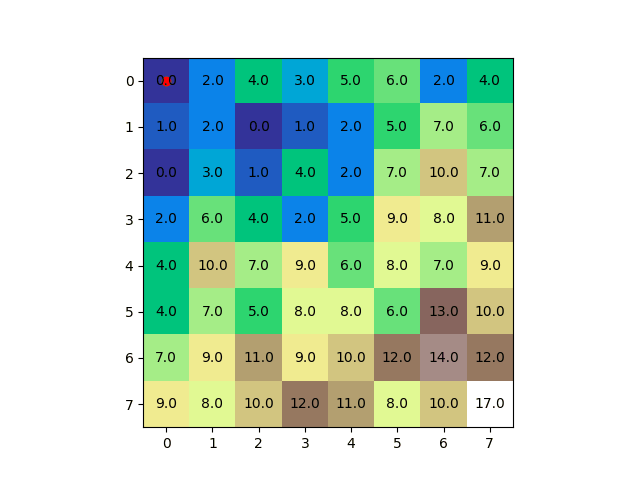

In [47]:
# display gif
from IPython.display import Image

generate_gif(frames_folder, gif_filename="solution.gif", fps=20)
Image(filename='solution.gif')



In [19]:
generate_gif(frames_folder, gif_filename, fps=2)

/var/folders/hg/kqg69xz568l28vnvcx6x09hh0000gn/T/ipykernel_28694/3357602299.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))
